In [155]:
# from Bio.KEGG import Pathway
# from Bio.KEGG import Entry

from Bio.KEGG import REST

import networkx as nx
import itertools

import matplotlib.pyplot as plt

# import rdflib

# from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph # didn't work well



In [197]:
human_pathways = REST.kegg_list("pathway", "hsa").read()
# human_pathways.decode("utf-8").split("\n")[0:5]
print(human_pathways)
print(type(human_pathways))
print(human_pathways[0])



hsa01100	Metabolic pathways - Homo sapiens (human)
hsa01200	Carbon metabolism - Homo sapiens (human)
hsa01210	2-Oxocarboxylic acid metabolism - Homo sapiens (human)
hsa01212	Fatty acid metabolism - Homo sapiens (human)
hsa01230	Biosynthesis of amino acids - Homo sapiens (human)
hsa01232	Nucleotide metabolism - Homo sapiens (human)
hsa01250	Biosynthesis of nucleotide sugars - Homo sapiens (human)
hsa01240	Biosynthesis of cofactors - Homo sapiens (human)
hsa00010	Glycolysis / Gluconeogenesis - Homo sapiens (human)
hsa00020	Citrate cycle (TCA cycle) - Homo sapiens (human)
hsa00030	Pentose phosphate pathway - Homo sapiens (human)
hsa00040	Pentose and glucuronate interconversions - Homo sapiens (human)
hsa00051	Fructose and mannose metabolism - Homo sapiens (human)
hsa00052	Galactose metabolism - Homo sapiens (human)
hsa00053	Ascorbate and aldarate metabolism - Homo sapiens (human)
hsa00500	Starch and sucrose metabolism - Homo sapiens (human)
hsa00520	Amino sugar and nucleotide sugar metabo

In [16]:
# Filter all human pathways for repair pathways
repair_pathways = []
for line in human_pathways.rstrip().split("\n"):
    entry, description = line.split("\t")
    if "repair" in description:
        repair_pathways.append(entry)

repair_pathways

['hsa03410', 'hsa03420', 'hsa03430']

In [18]:
# Get the genes for pathways and add them to a list
repair_genes = []
for pathway in repair_pathways:
    pathway_file = REST.kegg_get(pathway).read()  # query and read each pathway

    # iterate through each KEGG pathway file, keeping track of which section
    # of the file we're in, only read the gene in each pathway
    current_section = None
    for line in pathway_file.rstrip().split("\n"):
        section = line[:12].strip()  # section names are within 12 columns
        if not section == "":
            current_section = section

        if current_section == "GENE":
            gene_identifiers, gene_description = line[12:].split("; ")
            gene_id, gene_symbol = gene_identifiers.split()

            if not gene_symbol in repair_genes:
                repair_genes.append(gene_symbol)

print("There are %d repair pathways and %d repair genes. The genes are:" % \
        (len(repair_pathways), len(repair_genes)))
print(", ".join(repair_genes))

There are 3 repair pathways and 100 repair genes. The genes are:
OGG1, NTHL1, NEIL1, NEIL2, NEIL3, UNG, SMUG1, MUTYH, MPG, MBD4, TDG, APEX1, PNKP, TDP1, POLB, POLL, HMGB1, PARP1, PARP2, PARP3, PARP4, PARG, ADPRS, APTX, XRCC1, POLG, POLG2, LIG3, POLD1, POLD2, POLD3, POLD4, POLE, POLE2, POLE3, POLE4, PCNA, RFC1, RFC4, RFC2, RFC5, RFC3, FEN1, LIG1, RBX1, CUL4B, CUL4A, DDB1, DDB2, XPC, RAD23B, RAD23A, CETN2, ERCC8, ERCC6, UVSSA, POLR2A, POLR2B, POLR2C, POLR2D, POLR2E, POLR2F, POLR2G, POLR2H, POLR2I, POLR2L, POLR2K, POLR2J, POLR2J3, POLR2J2, POLR2M, CDK7, MNAT1, CCNH, ERCC3, ERCC2, GTF2H5, GTF2H1, GTF2H2, GTF2H2C_2, GTF2H2C, GTF2H3, GTF2H4, ERCC5, BIVM-ERCC5, XPA, RPA1, RPA2, RPA3, RPA4, ERCC4, ERCC1, SSBP1, PMS2, MLH1, MSH6, MSH2, MSH3, MLH3, EXO1


In [20]:
type(pathway_file)

str

In [10]:

request = REST.kegg_get("ec:5.4.2.2")


In [21]:
# # *** DIDN'T WORK ***
# # Get information about the KEGG pathway for glycolysis
# pathway = Pathway('ko00010')

# # Print the pathway name
# print(pathway.name)

# # Print the pathway title
# print(pathway.title)

# # Print the number of entries in the pathway
# print(len(pathway.entries))


NameError: name 'Pathway' is not defined

In [22]:
from Bio.KEGG.KGML.KGML_parser import read
pathway = read(open('KEGG/ko01100.xml', 'r'))
print(len(pathway.entries))
print(len(pathway.reactions))
print(len(pathway.maps))


FileNotFoundError: [Errno 2] No such file or directory: 'KEGG/ko01100.xml'

In [78]:
# REST.kegg_get()
# Herpes simplex virus 1 infection - Homo sapiens (human)
kgml_hsa05168 = REST.kegg_get("hsa05168", "kgml").read()
fname = "kgml_hsa05168.xml"
with open(fname, "w") as file:
    file.write(kgml_hsa05168)

In [198]:
# REST.kegg_get()
# hsa:01212 Fatty acid metabolism - Homo sapiens (human)
kgml_hsa01212 = REST.kegg_get("hsa01212", "kgml").read()
fname = "kgml_hsa01212.xml"
with open(fname, "w") as file:
    file.write(kgml_hsa01212)

In [101]:
# Try to get ortholog
# ko_entries = REST.kegg_list("ko").read()
# print(ko_entries)

kgml_K19264 = REST.kegg_get("K19264").read()
print(type(kgml_K19264))
print(kgml_K19264)
# fname = "kgml_***.xml"
# with open(fname, "w") as file:

<class 'str'>
ENTRY       K19264                      KO
SYMBOL      gD
NAME        Simplexvirus envelope glycoprotein D
PATHWAY     map03266  Virion - Herpesvirus
            map04061  Viral protein interaction with cytokine and cytokine receptor
            map05168  Herpes simplex virus 1 infection
NETWORK     nt06168  Herpes simplex virus 1 (HSV-1)
            nt06516  TNF signaling
  ELEMENT   N00560  HSV gD to HVEM-NFKB signaling pathway
BRITE       KEGG Orthology (KO) [BR:ko00001]
             09120 Genetic Information Processing
              09125 Information processing in viruses
               03266 Virion - Herpesvirus
                K19264  gD; Simplexvirus envelope glycoprotein D
             09130 Environmental Information Processing
              09133 Signaling molecules and interaction
               04061 Viral protein interaction with cytokine and cytokine receptor
                K19264  gD; Simplexvirus envelope glycoprotein D
             09160 Human Diseases
  

In [64]:
# REST.kegg_get()
# NF-kappa B signaling pathway - Homo sapiens (human)
kgml_hsa04064 = REST.kegg_get("hsa04064", "kgml").read()

In [65]:
fname = "kgml_hsa04064.xml"
with open(fname, "w") as file:
    file.write(kgml_hsa04064)

In [63]:
print(type(kgml_hsa04064))
print(kgml_hsa04064)

<class 'str'>
<?xml version="1.0"?>
<!DOCTYPE pathway SYSTEM "https://www.kegg.jp/kegg/xml/KGML_v0.7.2_.dtd">
<!-- Creation date: Apr 12, 2019 15:43:57 +0900 (GMT+9) -->
<pathway name="path:hsa04064" org="hsa" number="04064"
         title="NF-kappa B signaling pathway"
         image="https://www.kegg.jp/kegg/pathway/hsa/hsa04064.png"
         link="https://www.kegg.jp/kegg-bin/show_pathway?hsa04064">
    <entry id="5" name="path:hsa04060" type="map"
        link="https://www.kegg.jp/dbget-bin/www_bget?hsa04060">
        <graphics name="Cytokine-cytokine receptor interaction" fgcolor="#000000" bgcolor="#FFFFFF"
             type="roundrectangle" x="110" y="662" width="124" height="34"/>
    </entry>
    <entry id="6" name="hsa:598" type="gene"
        link="https://www.kegg.jp/dbget-bin/www_bget?hsa:598">
        <graphics name="BCL2L1, BCL-XL/S, BCL2L, BCLX, Bcl-X, PPP1R52" fgcolor="#000000" bgcolor="#BFFFBF"
             type="rectangle" x="967" y="334" width="46" height="17"/>
    

In [ ]:
'''
https://www.biostars.org/p/9544234/
REMEMBER: Try to use the UniProtKB format.

You can map identifiers of the form

hsa:286430

osa:4330905

mmu:76407

from KEGG to UniProtKB using the IDmapping service at https://www.uniprot.org/id-mapping
'''

'''
Okay. There are others too. I haven't found just a simple database yet though.
'''

In [143]:
# XML

# kgml_hsa05168 (HSV1)

import xml.etree.ElementTree as ET

xml_string = """
<data>
  <element1>Value 1</element1>
  <element2>Value 2</element2>
</data>
"""

# root = ET.fromstring(xml_string)

# for child in root:
#     tag_name = child.tag
#   text_content = child.text

#   print(tag_name, text_content)

G = nx.MultiDiGraph()


# class kegg_node():
    

root = ET.fromstring(kgml_hsa05168)
for child in root:
    print()
#     print("------")
#     print(dir(child))
#     print(child.tag) # says if entry, relation, etc. [if relation or reaction, add edge]
#     print(child.attrib)
    print(child.tag,child.attrib['type'])
    
    if child.tag=='entry':
        G.add_node(child.attrib['id'],**child.attrib)
    elif child.tag=='relation':
        rel_attr = {}
        for subtype in child:
            rel_attr[subtype.attrib['name']] = subtype.attrib['value']
        
        G.add_edge(child.attrib['entry1'],child.attrib['entry2'],**rel_attr)
        
    
    for subchild in child:
        if subchild.tag=='graphics':
            continue
            print('^')
        if child.tag=='relation':  # This is if child=='relation'
            print(subchild.tag,subchild.attrib['name'])
        elif child.attrib['type']=='group':  # 
            print('**',subchild.tag,subchild.attrib['id'])
        else:
            print(subchild.tag, subchild.tag)
        
        
    
    



entry map

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry ortholog

entry ortholog

entry ortholog

entry ortholog

entry gene

entry gene

entry gene

entry map

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry ortholog

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry map

entry map

entry ortholog

entry gene

entry gene

entry ortholog

entry gene

entry gene

entry gene

entry ortholog

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry gene

entry ortholog

entry ortholog

entry ortholog

entry gene

entry map

entry ortholog

entry gene

entry gene

entry map

entry gene

entry ortholog

entry ortholog

entry gene

e

In [195]:
print(G)
# for node in G.nodes():
#     print(node)

node_list = [node for node in G.nodes()]
# print(node_list)

edge_list = [edge for edge in G.edges()]
# print(edge_list)

nodes_from_edges = set(itertools.chain.from_iterable(edge_list))
print(nodes_from_edges)
len(nodes_from_edges)

print("Turns out all the orthologs do *not* have edges")


MultiDiGraph with 181 nodes and 98 edges
{'286', '276', '164', '290', '388', '187', '313', '215', '343', '122', '121', '90', '196', '165', '197', '255', '336', '213', '64', '66', '50', '214', '275', '89', '312', '193', '191', '75', '173', '44', '35', '201', '385', '47', '117', '158', '383', '347', '63', '18', '337', '12', '287', '148', '123', '174', '60', '120', '124', '61', '331', '363', '103', '348', '43', '175', '54', '13', '270', '172', '74', '119', '265', '314', '332', '177', '65', '384', '386', '46', '209', '344', '194', '19', '216', '171', '130', '329', '311', '118', '45', '382', '355', '102', '324', '33', '335', '277', '272', '192', '328', '92', '195', '381', '149', '34', '62', '338', '11', '15', '330', '76', '387', '375', '17', '206'}
Turns out all the orthologs do *not* have edges


MultiDiGraph with 106 nodes and 98 edges


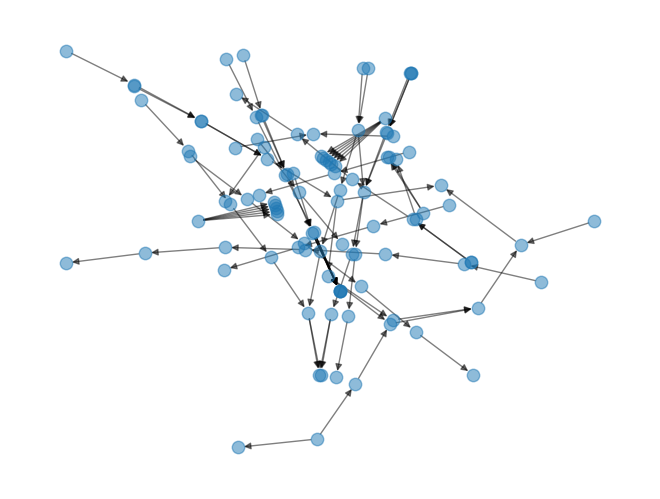

In [196]:
Gsub = G.subgraph(nodes_from_edges)
print(Gsub)
node_colors = []
# for node in G.nodes():
#     print(G.nodes[node]['type'])
#     if G.nodes[node]['type']=='ortholog':
#         print('*')
#         node_colors.append('r')
#     else:
#         node_colors.append('b')

    
#     if Gsub[node]
# [ortholog_nodes.append(node) for node in Gsub.nodes()]



# nx.draw(Gsub, node_size=100)
labels = {}
nx.draw_kamada_kawai(Gsub,node_size=80,alpha=0.5)
# nx.draw_shell(Gsub,node_size=100)

plt.show()